в данном файле мы смотрим, с какой частотой записывались семплы разных мышей в разные моменты времени. а также минимальные и максимальные координаты поля для каждой мыши

In [2]:
import traja
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    #оставлю в df номер пробы отдельным столбцом
    df = df.drop(df[df.time > 1755].index)
    df1 = df.copy()
    df = df.drop('numb', axis=1)
    df.traja.plot()
    return(df, df1)

In [4]:
def occupMapNorm(df):
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, 16)
    x_cut = pd.cut(df.x, binx, right=False)
    #делаем df где будет понятно сколько было точек в каждом бине 
    #соответсвуеющему данному интервалу х и данному интервалу у
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, 16)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).count()
    
    print(x_cut.isnull().values.any(), y_cut.isnull().values.any())
    
    dfn = dfn.drop(columns=['x','y'])
    dfn = dfn.rename(columns={'time': 'Count'})
    
    #сделаем df с норм числами в индексах, а не с интервалами
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    
    dd = dfm.unstack()
    dd = dd.replace(0, 1.e-1)
    arrd = dd.to_numpy()
    arrl = np.log(arrd)
    arrsrsr = np.sqrt(np.sqrt(np.sqrt(arrd)))
    sns.heatmap(arrl, square=True, xticklabels=False, yticklabels=False)
    return(arrl)
    

### Загрузка траекторий

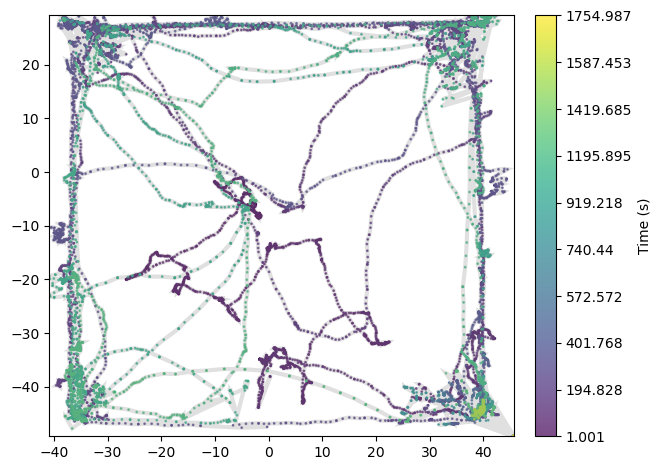

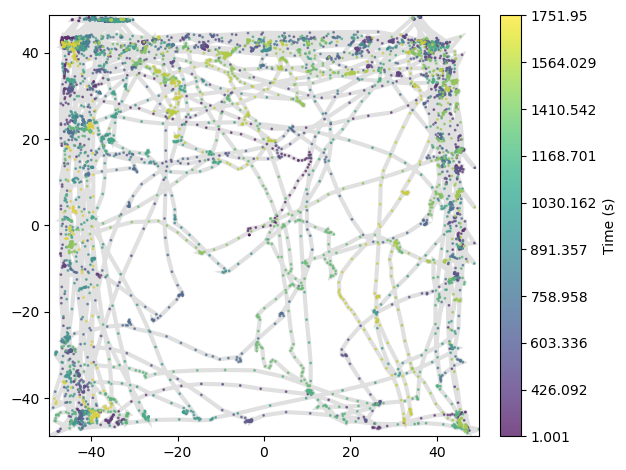

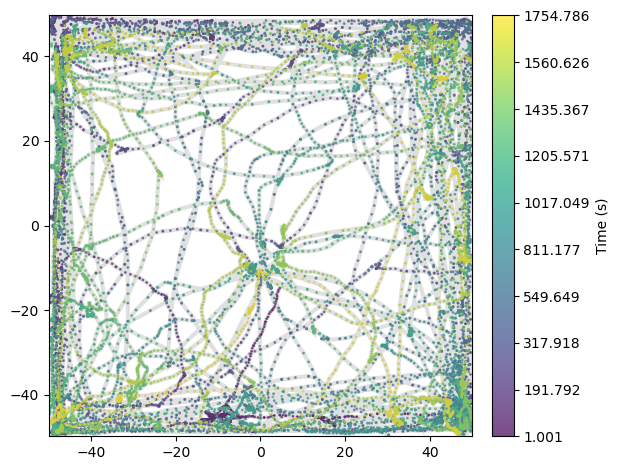

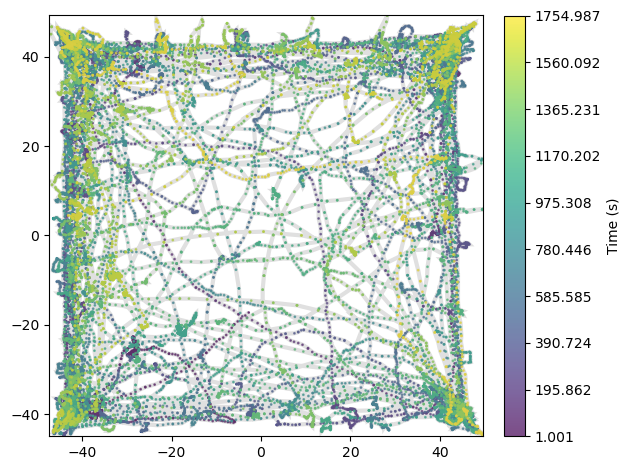

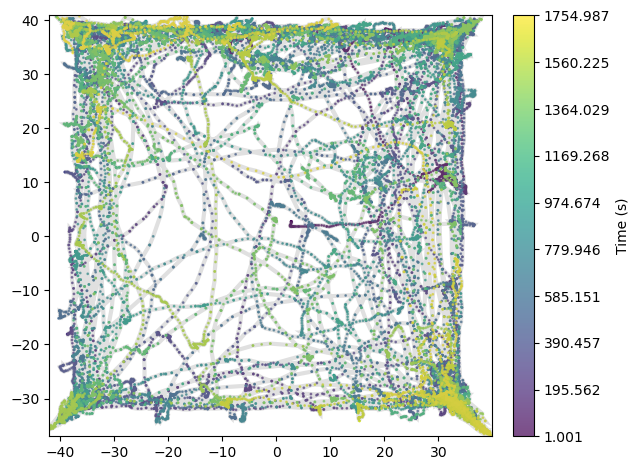

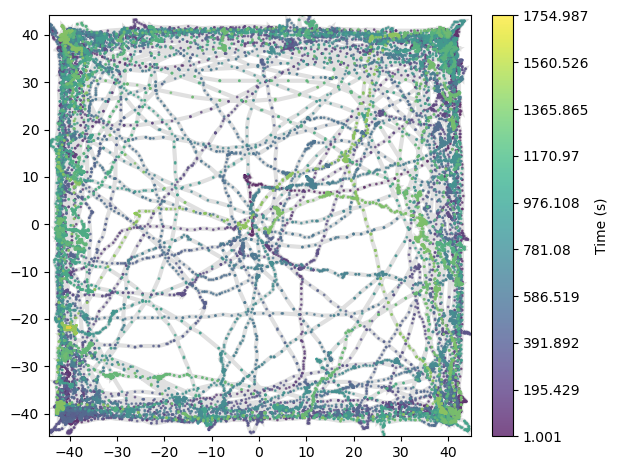

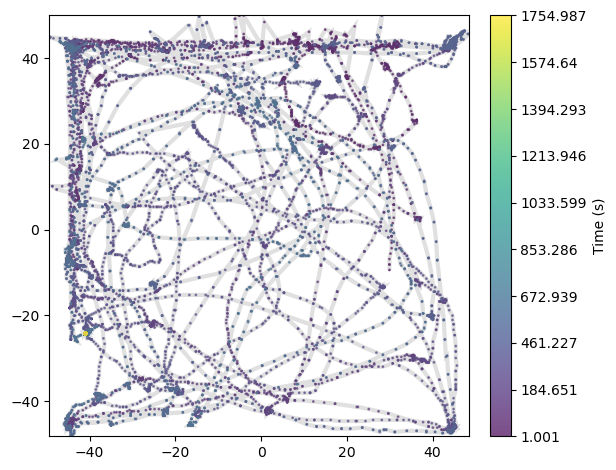

In [6]:
tr4, tr4c = openFile('Trace_4.txt')
tr3, tr3c = openFile('Trace_3.txt')
tr5, tr5c = openFile('Trace_5.txt')
tr6, tr6c = openFile('Trace_6.txt')
tr7, tr7c = openFile('Trace_7.txt')
tr9, tr9c = openFile('Trace_9.1.txt')
tr92, tr92c = openFile('Trace_9.2.txt')

In [5]:
%matplotlib inline

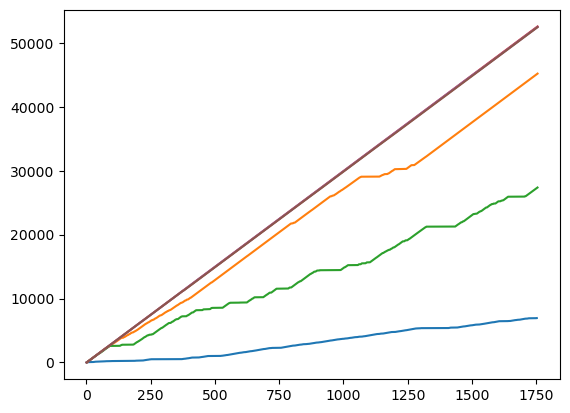

In [7]:
plt.plot(tr3c['time'], tr3c['numb'])
plt.plot(tr4c['time'], tr4c['numb'])
plt.plot(tr5c['time'], tr5c['numb'])
plt.plot(tr6c['time'], tr6c['numb'])
plt.plot(tr7c['time'], tr7c['numb'])
plt.plot(tr9c['time'], tr9c['numb'])

синяя 2021.01.20
желтая 2021.01.19
зеленая 2021.01.21

<AxesSubplot:>

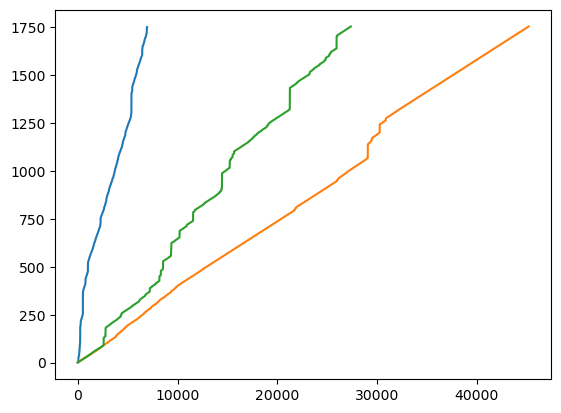

In [10]:
tr3['time'].plot(use_index=True)
tr4['time'].plot(use_index=True)
tr5['time'].plot(use_index=True)

In [16]:
(tr6['time'].max() - tr6['time'].min()) / len(tr6)

0.033369848940299075

In [13]:
tr6

,time,x,y
0,1.001,-2.749,-17.252
1,1.034,-3.507,-17.916
2,1.068,-4.455,-18.579
3,1.101,-5.214,-19.243
4,1.134,-5.972,-19.906
...,...,...,...
52557,1754.853,48.723,-44.078
52558,1754.886,48.913,-44.173
52559,1754.920,48.913,-44.173
52560,1754.953,49.197,-44.363


<AxesSubplot:>

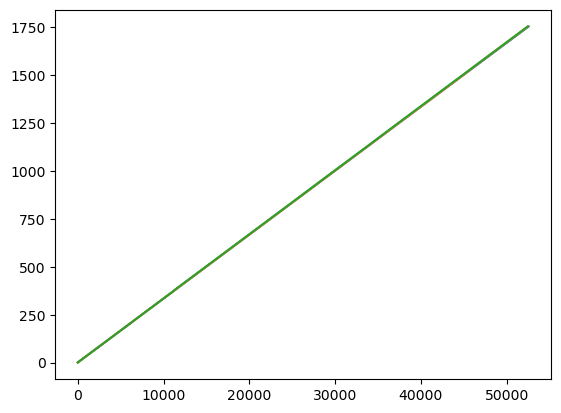

In [17]:
tr6['time'].plot(use_index=True)
tr7['time'].plot(use_index=True)
tr9['time'].plot(use_index=True)

<AxesSubplot:>

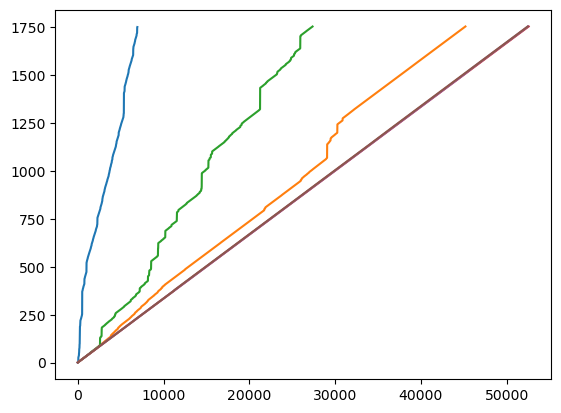

In [9]:
tr3['time'].plot(use_index=True)
tr4['time'].plot(use_index=True)
tr5['time'].plot(use_index=True)
tr6['time'].plot(use_index=True)
tr7['time'].plot(use_index=True)
tr9['time'].plot(use_index=True)

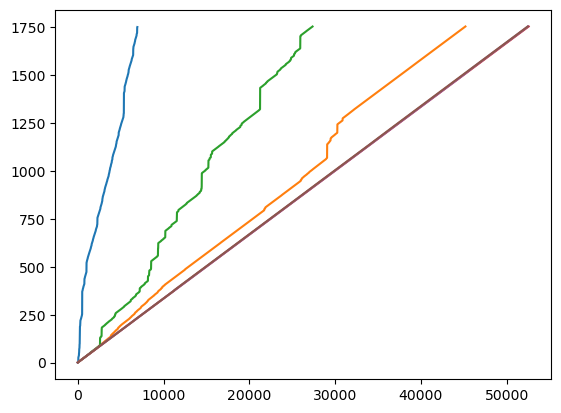

In [10]:
plt.plot(tr3['time'])
plt.plot(tr4['time'])
plt.plot(tr5['time'])
plt.plot(tr6['time'])
plt.plot(tr7['time'])
plt.plot(tr9['time'])

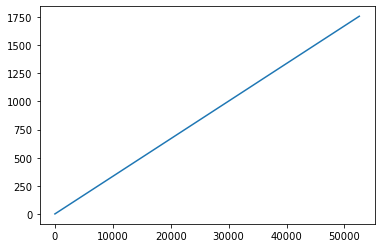

In [90]:
plt.plot(tr6['time'])

#### Пусть первая точка будет (0, 0)

In [6]:
def X0Y0(tr):
    tr['x'] = tr['x'] - tr['x'][0]
    tr['y'] = tr['y'] - tr['y'][0]
    return(tr)
    

In [7]:
alltr = [tr4, tr3, tr5, tr6, tr7, tr9]

In [8]:
for i in alltr:
    i = X0Y0(i)

In [9]:
for i in alltr:
    print(i['x'].max(), i['x'].min())

49.083 -37.559000000000005
53.128 -46.31
45.334999999999994 -54.491
52.42 -44.647
37.122 -44.779
46.858 -42.265


In [10]:
for i in alltr:
    print(i['y'].max(), i['y'].min())

34.496 -43.904
50.76 -46.594
64.384 -34.998000000000005
66.449 -27.679
38.07 -39.747
46.169 -42.724


In [11]:
for i in alltr:
    print(i['x'].max() - i['x'].min(), i['y'].max() - i['y'].min())

86.642 78.4
99.438 97.354
99.826 99.382
97.06700000000001 94.128
81.90100000000001 77.81700000000001
89.12299999999999 88.893


### Все что ниже - черновик

### Графики тайм серий x и y

In [13]:
%matplotlib inline

In [14]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [15]:
figure, axis = plt.subplots(2, 1)
axis[0].plot(tr3['time'], tr3['x'])
axis[0].set_title("X Function")
  
# For Cosine Function
axis[1].plot(tr3['time'], tr3['y'])
axis[1].set_title("Y Function")

Text(0.5, 1.0, 'Y Function')

### Автокорреляция. Ну с лагплотом не оч, т к понятно, что следующая координата примерно равна предыдущей

In [16]:
pd.plotting.lag_plot(tr3['x'], lag=1)

<AxesSubplot:title={'center':'Y Function'}, xlabel='y(t)', ylabel='y(t + 1)'>

In [17]:
pd.plotting.lag_plot(tr3['y'], lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

In [18]:
%matplotlib inline

##### Method 2: Creating lagged variables at different time steps

In [19]:
values = pd.DataFrame(tr3['x'])
values

,x
0,0.000
1,0.000
2,0.000
3,-0.284
4,-0.190
...,...
6941,-40.722
6942,-40.628
6943,-40.722
6944,-41.575


In [20]:
# using shift function to shift the values.
dataframe = pd.concat([values.shift(367), values.shift(97),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t-370', 't+100', 't+2', 't+3']
dataframe

,t-370,t+100,t+2,t+3
0,NaN,NaN,NaN,0.000
1,NaN,NaN,0.000,0.000
2,NaN,NaN,0.000,0.000
3,NaN,NaN,0.000,-0.284
4,NaN,NaN,-0.284,-0.190
...,...,...,...,...
6941,25.380,-42.900,-40.722,-40.722
6942,24.338,-42.995,-40.722,-40.628
6943,23.581,-42.522,-40.628,-40.722
6944,22.918,-42.806,-40.722,-41.575


In [22]:
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

          t-370     t+100       t+2       t+3
t-370  1.000000 -0.135678  0.104400  0.106660
t+100 -0.135678  1.000000  0.285544  0.278609
t+2    0.104400  0.285544  1.000000  0.999050
t+3    0.106660  0.278609  0.999050  1.000000


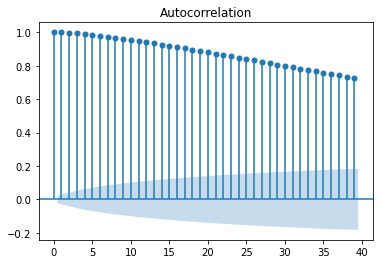

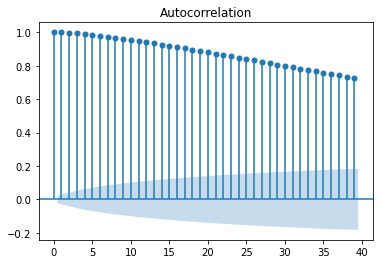

In [54]:
# import the required modules
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
 
# read the csv data
data = tr3['x']
# plot the auto correlation
plot_acf(data)

##### Вот наконец адекватный график автокорреляции

In [21]:
# Our data set 
datax = tr3['x']
print(len(datax))


6946


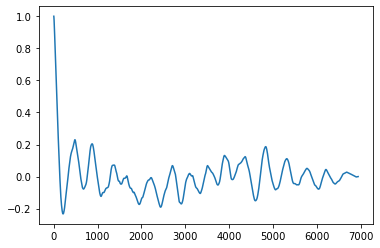

In [22]:
# Delay (lag) range that we are interesting in
lags = range(6946)
#''' Statsmodels '''

import statsmodels.api as sm

acorrx = sm.tsa.acf(datax, nlags = len(lags)-1, fft=False)

acorrx

plt.plot(acorrx)
plt.show()

In [47]:
%matplotlib inline

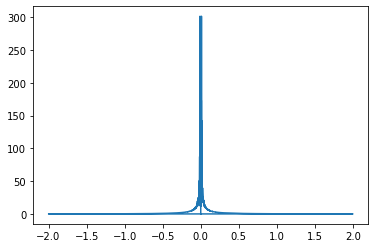

In [93]:

from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
Nn = len(acorrx)

yf = fft(acorrx)
xf = fftfreq(Nn, 1 / 4)

plt.plot(xf, np.abs(yf))
plt.show()

In [92]:
type(acorrx)

numpy.ndarray

6946


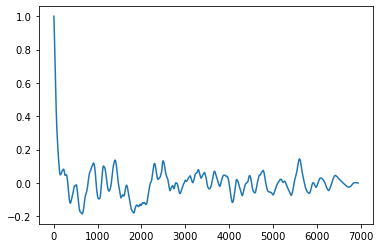

In [25]:
# Our data set 
datay = tr3['y']
print(len(datay))
# Delay (lag) range that we are interesting in
lags = range(len(datay))
#''' Statsmodels '''

import statsmodels.api as sm

acorry = sm.tsa.acf(datay, nlags = len(lags)-1, fft=False)

acorry

plt.plot(acorry)
plt.show()

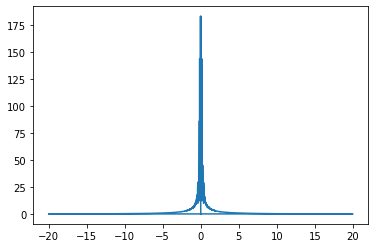

In [27]:

from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
Nn = len(acorry)

yf = fft(acorry)
xf = fftfreq(Nn, 1 / 40)

plt.plot(xf, np.abs(yf))
plt.show()

In [77]:
%matplotlib inline

### Фурье трансформ - выходит фигня

In [50]:
duration = (tr3['time'].iloc[-1] - tr3['time'].iloc[1])
sampleRate = len(tr3)/duration
print(sampleRate)

3.9672929651088404


In [55]:
len(valuesx)

6946

In [54]:
valuesx = pd.DataFrame(tr3['x'])
print(valuesx)

           x
0     -3.409
1     -3.409
2     -3.409
3     -3.693
4     -3.599
...      ...
6941 -44.131
6942 -44.037
6943 -44.131
6944 -44.984
6945 -46.309

[6946 rows x 1 columns]


In [61]:
%matplotlib inline

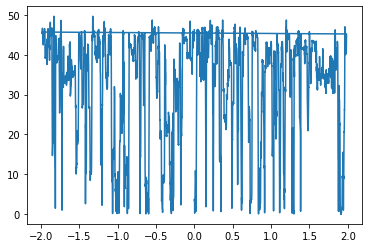

In [84]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = len(valuesx)

yf = fft(valuesx)
xf = fftfreq(N, 1 / sampleRate)

plt.plot(xf, np.abs(yf))
plt.show()

#### Проверяем данные tr92 на адекватность

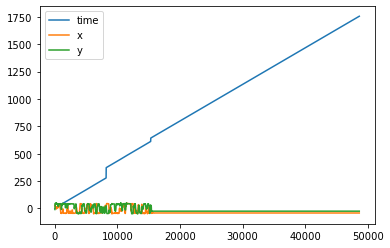

In [54]:
tr92.plot()
plt.show()
#то есть по идее мышь засела в одном месте и мне кажется стоит исключить это из анализа

#### Строим карты оккупации со шкалой от 0 до 1

In [17]:
%matplotlib inline

In [41]:
def minmax(occ):
    kk = (occ - np.amin(occ)) / (np.amax(occ) - np.amin(occ))
    kl = pd.DataFrame(kk)
    sns.heatmap(kl, square=True, xticklabels=False, yticklabels=False)
    return kl

False False


numpy.ndarray

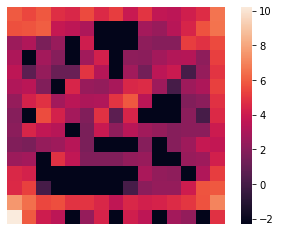

In [30]:
occ4 = occupMapNorm(tr4)
type(occ4)

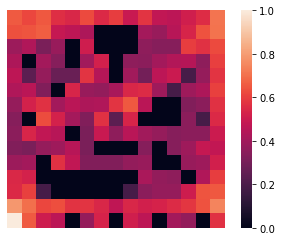

In [42]:
occ4 = minmax(occ4)

In [62]:
occ3 = occupMapNorm(tr3)

False False


In [63]:
occ3

array([[ 4.02535169,  3.49650756,  4.00733319,  4.24849524,  1.79175947,
         2.7080502 ,  4.34380542,  3.95124372,  3.33220451,  3.21887582,
         4.61512052,  4.07753744,  4.81218436,  5.21493576,  4.95582706],
       [ 5.19295685,  4.18965474,  3.29583687,  2.30258509,  2.19722458,
         3.52636052,  3.4339872 ,  3.21887582,  2.30258509,  3.80666249,
         4.54329478,  4.36944785,  3.8918203 ,  5.28826703,  5.4161004 ],
       [ 4.21950771,  3.29583687,  1.79175947,  2.19722458,  2.30258509,
         1.60943791,  0.69314718,  1.38629436,  2.39789527,  2.39789527,
         4.24849524,  3.17805383,  3.29583687,  4.33073334,  6.32793678],
       [ 3.4657359 ,  1.38629436,  2.19722458,  1.09861229,  2.30258509,
        -2.30258509, -2.30258509,  1.09861229,  1.38629436,  2.77258872,
         2.19722458,  2.07944154,  3.09104245,  4.61512052,  3.97029191],
       [ 2.56494936,  1.79175947,  1.09861229,  0.69314718,  1.09861229,
         2.48490665,  0.69314718,  2.48490665, 

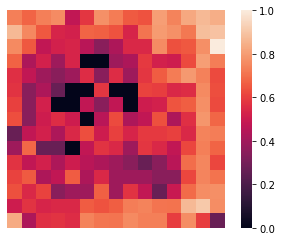

In [43]:
occ3 = minmax(occ3)

False False


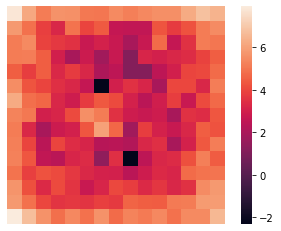

In [32]:
occ5 = occupMapNorm(tr5)


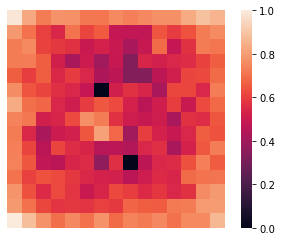

In [44]:
occ5 = minmax(occ5)

False False


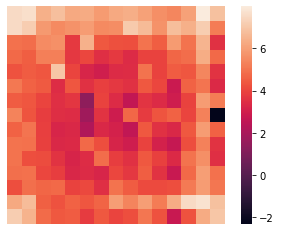

In [33]:
occ6 = occupMapNorm(tr6)


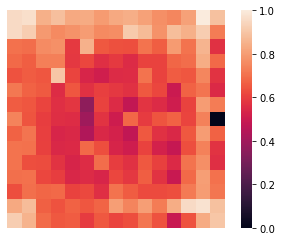

In [45]:
occ6=minmax(occ6)

False False


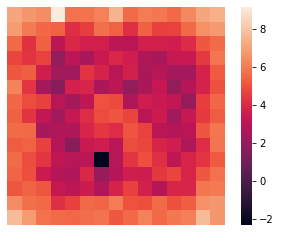

In [34]:
occ9 = occupMapNorm(tr9)

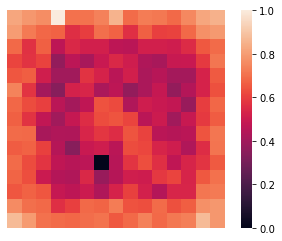

In [46]:
occ9 = minmax(occ9)

False False


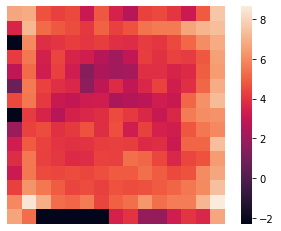

In [48]:
occ7 = occupMapNorm(tr7)

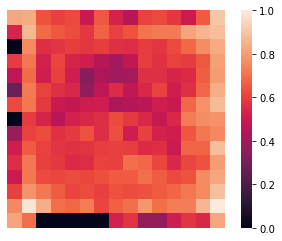

In [58]:
occ7 = minmax(occ7)

## Average occupancy scores

In [60]:
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [61]:
occMean = np.mean( np.array([ occ3, occ4, occ5, occ6, occ7, occ9]), axis=0 )
sns.heatmap(occMean, square=True, xticklabels=False, yticklabels=False)
#блин тут другая ось справа... мб стоит нормализовать

<AxesSubplot:>

In [41]:
tr4 = pd.read_csv('Trace_4.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr4 = tr4.drop('numb', axis=1)
tr4 = tr4.drop(tr4[tr4.time > 1755].index)
tr4

,time,x,y
0,1.001,-3.355,-5.324
1,1.034,-3.355,-5.324
2,1.068,-3.355,-5.324
3,1.101,-3.355,-5.324
4,1.134,-3.282,-5.324
...,...,...,...
45184,1754.853,45.655,-49.228
45185,1754.886,45.655,-49.228
45186,1754.920,45.655,-49.228
45187,1754.953,45.655,-49.228


In [34]:
tr3 = pd.read_csv('Trace_3.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr3 = tr3.drop('numb', axis=1)
tr3 = tr3.drop(tr3[tr3.time > 1755].index)
tr3

,numb,time,x,y
0,1,1.001,-3.409,-2.178
1,2,1.134,-3.409,-2.178
2,3,1.268,-3.409,-2.178
3,4,1.401,-3.693,-1.231
4,5,1.535,-3.599,-0.758
...,...,...,...,...
6941,6942,1750.882,-44.131,3.883
6942,6943,1751.016,-44.037,4.262
6943,6944,1751.149,-44.131,4.356
6944,6945,1751.283,-44.984,4.072


In [40]:
tr5 = pd.read_csv('Trace_5.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr5.drop('numb', axis=1)
tr5 = tr5.drop(tr5[tr5.time > 1755].index)
tr5

,numb,time,x,y
0,1,1.001,4.578,-14.767
1,2,1.034,4.282,-15.210
2,3,1.068,4.135,-15.653
3,4,1.101,3.839,-16.244
4,5,1.134,3.987,-16.687
...,...,...,...,...
27364,27365,1754.653,-48.583,-46.221
27365,27366,1754.686,-49.027,-46.516
27366,27367,1754.720,-49.470,-46.811
27367,27368,1754.753,-49.913,-47.550


In [36]:
tr6 = pd.read_csv('Trace_6.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr6.drop('numb', axis=1)
tr6 = tr6.drop(tr6[tr6.time > 1755].index)
tr6

,numb,time,x,y
0,1,1.001,-2.749,-17.252
1,2,1.034,-3.507,-17.916
2,3,1.068,-4.455,-18.579
3,4,1.101,-5.214,-19.243
4,5,1.134,-5.972,-19.906
...,...,...,...,...
52557,52558,1754.853,48.723,-44.078
52558,52559,1754.886,48.913,-44.173
52559,52560,1754.920,48.913,-44.173
52560,52561,1754.953,49.197,-44.363


In [37]:
tr7 = pd.read_csv('Trace_7.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr7.drop('numb', axis=1)
tr7 = tr7.drop(tr7[tr7.time > 1755].index)
tr7

,numb,time,x,y
0,1,1.001,2.771,2.771
1,2,1.034,2.771,2.771
2,3,1.068,2.771,2.771
3,4,1.101,2.771,2.698
4,5,1.134,2.771,2.626
...,...,...,...,...
52480,52481,1754.853,-37.997,35.226
52481,52482,1754.886,-37.705,34.715
52482,52483,1754.920,-37.705,34.715
52483,52484,1754.953,-37.632,34.205


In [38]:
tr91 = pd.read_csv('Trace_9.1.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr91.drop('numb', axis=1)
tr91 = tr91.drop(tr91[tr91.time > 1755].index)
tr91

,numb,time,x,y
0,1,1.001,-2.067,-2.067
1,2,1.034,-1.838,-2.067
2,3,1.068,-1.608,-2.297
3,4,1.101,-1.608,-2.297
4,5,1.134,-1.378,-2.297
...,...,...,...,...
52445,52446,1754.853,-40.197,-21.821
52446,52447,1754.886,-39.967,-21.821
52447,52448,1754.920,-40.197,-21.821
52448,52449,1754.953,-40.197,-21.821


In [39]:
tr92 = pd.read_csv('Trace_9.2.txt', sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
tr92.drop('numb', axis=1)
tr92 = tr92.drop(tr92[tr92.time > 1755].index)
tr92

,numb,time,x,y
0,1,1.001,29.919,-9.381
1,2,1.034,29.919,-8.114
2,3,1.068,29.919,-8.114
3,4,1.101,29.919,-6.846
4,5,1.134,30.173,-5.578
...,...,...,...,...
48639,48640,1754.853,-40.822,-24.341
48640,48641,1754.886,-40.822,-24.341
48641,48642,1754.920,-41.076,-24.088
48642,48643,1754.953,-41.076,-24.088


### Divergency all mice

In [71]:
def divMap(df, n):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            vx.append((df['x'][i]-df['x'][i-1])/(df['time'][i]-df['time'][i-1]))
            vy.append((df['y'][i]-df['y'][i-1])/(df['time'][i]-df['time'][i-1]))
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            div.append(vvx/dx + vvy/dy)
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "divergence", div)
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #заменим nan на 0
    dfn = dfn.fillna(0)
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    return dfn

In [68]:
%matplotlib inline

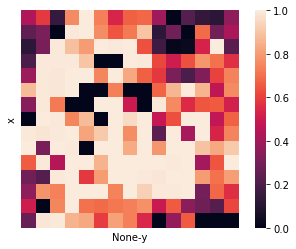

In [72]:
div3 = divMap(tr3, 15)

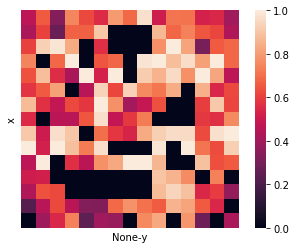

In [73]:
div4 = divMap(tr4, 15)

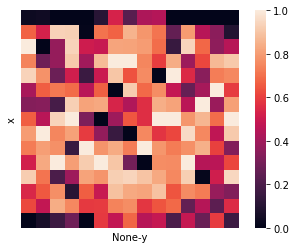

In [74]:
div5 = divMap(tr5, 15)

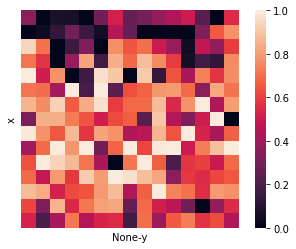

In [75]:
div6 = divMap(tr6, 15)

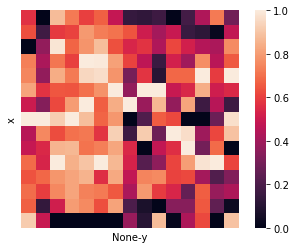

In [76]:
div7 = divMap(tr7, 15)

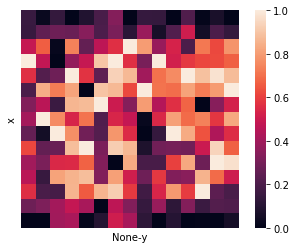

In [77]:
div9 = divMap(tr9, 15)

<AxesSubplot:>

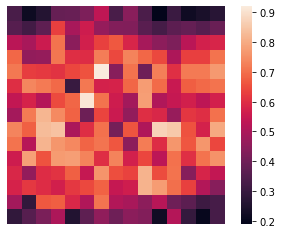

In [79]:
divMean = np.mean( np.array([ div3, div4, div5, div6, div7, div9]), axis=0 )
sns.heatmap(divMean, square=True, xticklabels=False, yticklabels=False)